# Análisis exploratorio de los datos-EDA

Bibliotecas utilizadas

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from datetime import datetime
import os

Archivos

In [3]:
# Obtén el directorio actual del script
current_directory = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()

# Construye la ruta al archivo de datos en la carpeta 'dataset_limpios'
file_path_games = os.path.join(current_directory, '..', 'datasets_limpios', 'df_games.parquet.gzip')

# Ahora 'file_path_games' contiene la ruta completa al archivo que estás buscando
print(file_path_games)

# Ruta del archivo parquet
df_games = pd.read_parquet(file_path_games)



c:\Users\57315\OneDrive\Documentos\Phyton_Henry\proyecto individual 1\PI MLOps - STEAM\notebooks\..\datasets_limpios\df_games.parquet.gzip


In [4]:
# Construye la ruta al archivo de datos en la carpeta 'dataset_limpios'
file_path_reviews = os.path.join(current_directory, '..', 'datasets_limpios', 'df_reviews.parquet.gzip')

# Ahora 'file_path_reviews' contiene la ruta completa al archivo que estás buscando
print(file_path_reviews)

df_reviews = pd.read_parquet(file_path_reviews)

c:\Users\57315\OneDrive\Documentos\Phyton_Henry\proyecto individual 1\PI MLOps - STEAM\notebooks\..\datasets_limpios\df_reviews.parquet.gzip


In [5]:
# Construye la ruta al archivo de datos en la carpeta 'dataset_limpios'
file_path_items = os.path.join(current_directory, '..', 'datasets_limpios', 'df_items.parquet.gzip')

# Ahora 'file_path_items' contiene la ruta completa al archivo que estás buscando
print(file_path_items)

df_items = pd.read_parquet(file_path_items)

c:\Users\57315\OneDrive\Documentos\Phyton_Henry\proyecto individual 1\PI MLOps - STEAM\notebooks\..\datasets_limpios\df_items.parquet.gzip


## df_reviews

### Información Básica

In [6]:
df_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
1,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58458 entries, 0 to 25798
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        58430 non-null  object
 1   posted       58430 non-null  object
 2   last_edited  58430 non-null  object
 3   item_id      58430 non-null  object
 4   helpful      58430 non-null  object
 5   recommend    58430 non-null  object
 6   review       58430 non-null  object
 7   user_id      58458 non-null  string
dtypes: object(7), string(1)
memory usage: 4.0+ MB


In [8]:
df_reviews.isnull().sum()

funny          28
posted         28
last_edited    28
item_id        28
helpful        28
recommend      28
review         28
user_id         0
dtype: int64

In [9]:
#Elimina columnas con información irrelevante
df_reviews = df_reviews.drop(columns=['funny', 'helpful'])

In [10]:
#Revisa cuales son las filas que tienen a excepción de user_id y review, todas las columnas con valores nulos
filas_con_todo_nulo_exp_id_rev = df_reviews[(df_reviews['user_id'].notnull()) & (df_reviews['posted'].isnull())]
filas_con_todo_nulo_exp_id_rev

,posted,last_edited,item_id,recommend,review,user_id
62,None,None,None,None,None,gdxsd
83,None,None,None,None,None,76561198094224872
1047,None,None,None,None,None,76561198021575394
3954,None,None,None,None,None,cmuir37
5394,None,None,None,None,None,Jaysteeny
6135,None,None,None,None,None,ML8989
7583,None,None,None,None,None,76561198079215291
7952,None,None,None,None,None,76561198079342142
9894,None,None,None,None,None,76561198061996985
10381,None,None,None,None,None,76561198108286351


In [11]:
#Elimina las filas que por su cantidad de valores nulos no aportan información relevante
df_reviews = df_reviews.dropna(subset='posted')

In [12]:
# Eliminar el texto "Posted"
df_reviews['posted'] = df_reviews['posted'].str.replace('Posted ', '')

In [13]:
# Eliminar el texto "."
df_reviews['posted'] = df_reviews['posted'].str.replace('.', '')

In [14]:
# Convertir la columna 'date_posted' a tipo datetime
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], errors='coerce')

# Extraer solo la parte de la fecha
df_reviews['posted'] = df_reviews['posted'].dt.date

In [15]:
df_reviews['posted'].unique()

array([datetime.date(2011, 11, 5), datetime.date(2011, 7, 15),
       datetime.date(2011, 4, 21), ..., datetime.date(2013, 2, 18),
       datetime.date(2012, 11, 13), datetime.date(2012, 11, 3)],
      dtype=object)

In [16]:
# Eliminar el texto "last_edited" y "."
df_reviews['last_edited'] = df_reviews['last_edited'].str.replace('Last edited ', '')
df_reviews['last_edited'] = df_reviews['last_edited'].str.replace('.', '')

In [17]:
# Convertir la columna 'last_edited' a tipo datetime
df_reviews['last_edited'] = pd.to_datetime(df_reviews['last_edited'], errors='coerce')

# Extraer solo la parte de la fecha
df_reviews['last_edited'] = df_reviews['last_edited'].dt.date

In [18]:
df_reviews['last_edited'].unique()

array([NaT, datetime.date(2015, 12, 5), datetime.date(2013, 11, 25),
       datetime.date(2014, 6, 22), datetime.date(2015, 7, 30),
       datetime.date(2014, 12, 28), datetime.date(2015, 10, 4),
       datetime.date(2015, 11, 27), datetime.date(2014, 3, 2),
       datetime.date(2014, 6, 24), datetime.date(2013, 11, 26),
       datetime.date(2015, 4, 12), datetime.date(2015, 7, 24),
       datetime.date(2014, 4, 24), datetime.date(2015, 3, 19),
       datetime.date(2014, 6, 17), datetime.date(2014, 7, 10),
       datetime.date(2015, 10, 5), datetime.date(2015, 3, 4),
       datetime.date(2015, 11, 8), datetime.date(2015, 5, 11),
       datetime.date(2015, 2, 4), datetime.date(2014, 4, 21),
       datetime.date(2014, 10, 1), datetime.date(2013, 12, 28),
       datetime.date(2015, 8, 2), datetime.date(2014, 12, 27),
       datetime.date(2015, 3, 14), datetime.date(2014, 2, 27),
       datetime.date(2014, 6, 11), datetime.date(2014, 6, 18),
       datetime.date(2014, 1, 1), datetime.date(

In [19]:
df_reviews['item_id'] = pd.to_numeric(df_reviews['item_id'] )

In [20]:
df_reviews['item_id'].unique()

array([  1250,  22200,  43110, ..., 220090, 262850, 431510], dtype=int64)

In [21]:
df_reviews['recommend'] = df_reviews['recommend'].apply(str)

In [22]:
df_reviews['recommend'].unique()

array(['True', 'False'], dtype=object)

In [23]:
df_reviews['review'] = df_reviews['review'].apply(str)

In [24]:
df_reviews['review'].unique()

array(['Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
       "It's unique and worth a playthrough.",
       'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!',
       ...,
       'this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.',
       'had so much fun plaing t

In [25]:
#Genera nuevo archivo a partir de un dataframe
df_reviews.to_parquet('C:/Users/57315/OneDrive/Documentos/Phyton_Henry/proyecto individual 1/PI MLOps - STEAM/datasets_limpios/df_reviews_clean.parquet.gzip', compression='gzip')

### Estadísticas Descriptivas

In [26]:
df_reviews.describe(include='all')

,posted,last_edited,item_id,recommend,review,user_id
count,48498,4219,58430.000000,58430,58430,58430
unique,1644,755,NaN,2,55312,25457
top,2014-06-21,2013-11-25,NaN,True,good game,76561198108415635
freq,220,99,NaN,51691,98,10
mean,NaN,NaN,169705.328188,NaN,NaN,NaN
std,NaN,NaN,132020.311111,NaN,NaN,NaN
min,NaN,NaN,10.000000,NaN,NaN,NaN
25%,NaN,NaN,8930.000000,NaN,NaN,NaN
50%,NaN,NaN,218230.000000,NaN,NaN,NaN
75%,NaN,NaN,261640.000000,NaN,NaN,NaN


#### Observaciones
Sin distinguir por juego, la mayoria de las recomedaciones son positivas, con una frecuencia de 51691.

### Distribución de Variables Categoricas

c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


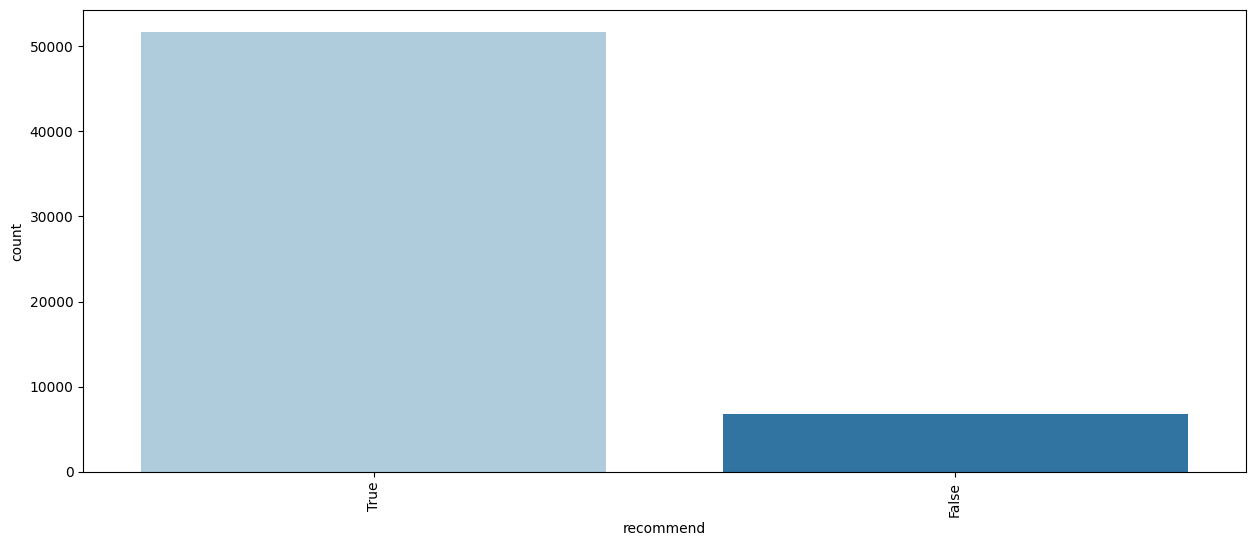

In [27]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 6))  # Ajusta los valores según sea necesario (ancho, alto)

# Crear el gráfico de barras
sns.countplot(x='recommend', data=df_reviews, palette='Paired')

# Girar las etiquetas del eje x
plt.xticks(rotation=90)  # Ajusta el ángulo según sea necesario

# Mostrar el gráfico
plt.show()

## df_items

### Información Básica

In [28]:
df_items.head()

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
indice_original,,,,,,
0,76561197970982479,277,10,Counter-Strike,6.0,0.0
0,76561197970982479,277,20,Team Fortress Classic,0.0,0.0
0,76561197970982479,277,30,Day of Defeat,7.0,0.0
0,76561197970982479,277,40,Deathmatch Classic,0.0,0.0
0,76561197970982479,277,50,Half-Life: Opposing Force,0.0,0.0


In [29]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110796 entries, 0 to 88309
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           string 
 1   items_count       int64  
 2   item_id           object 
 3   item_name         object 
 4   playtime_forever  float64
 5   playtime_2weeks   float64
dtypes: float64(2), int64(1), object(2), string(1)
memory usage: 272.9+ MB


In [30]:
df_items.isnull().sum()

user_id                 0
items_count             0
item_id                 0
item_name               0
playtime_forever    16714
playtime_2weeks     16714
dtype: int64

In [31]:
# Convertir la columna 'item_id' a tipo float
df_items['item_id'] = pd.to_numeric(df_items['item_id'], errors='coerce')

In [32]:
#Revisa cuales son las filas que tienen a excepción de user_id y review, todas las columnas con valores nulos
filas_con_todo_nulo_exp_id = df_items[(df_items['user_id'].notnull()) & (df_items['item_id'].isnull()) & (df_items['playtime_forever'].isnull()) & (df_items['playtime_2weeks'].isnull())]
filas_con_todo_nulo_exp_id

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
indice_original,,,,,,
9,Wackky,0,NaN,,NaN,NaN
11,76561198079601835,0,NaN,,NaN,NaN
31,hellom8o,0,NaN,,NaN,NaN
38,starkillershadow553,0,NaN,,NaN,NaN
54,darkenkane,0,NaN,,NaN,NaN
...,...,...,...,...,...,...
88298,76561198316380182,0,NaN,,NaN,NaN
88299,76561198316970597,0,NaN,,NaN,NaN
88300,76561198318100691,0,NaN,,NaN,NaN


In [33]:
# Eliminar las filas que cumplen con la condición y asignar el resultado a un nuevo DataFrame
df_items = df_items.dropna(subset='item_id')

In [34]:
unique_item_ids = df_items['item_id'].unique()
print(unique_item_ids)
print("Cantidad total de valores únicos:", len(unique_item_ids))
print("¿Hay valores NaN?:", pd.isnull(unique_item_ids).any())


[1.0000e+01 2.0000e+01 3.0000e+01 ... 3.5428e+05 4.3392e+05 4.8527e+05]
Cantidad total de valores únicos: 10978
¿Hay valores NaN?: False


In [35]:
df_items['item_name'] = df_items['item_name'].astype('str')

In [36]:
# Convierte todos los nombres a minúsculas para evitar que se creen valores unicos con nombres repetidos
df_items['item_name'] = df_items['item_name'].str.lower()


In [37]:
unique_item_names = df_items['item_name'].unique()
print(unique_item_names)
print("Cantidad total de valores únicos:", len(unique_item_names))
print("¿Hay valores NaN?:", pd.isnull(unique_item_names).any())

['counter-strike' 'team fortress classic' 'day of defeat' ... 'chaostower'
 'aveyond 4: shadow of the mist' 'arachnophobia']
Cantidad total de valores únicos: 10944
¿Hay valores NaN?: False


### Estadísticas Descriptivas

In [38]:
df_items.describe(include='all')

,user_id,items_count,item_id,item_name,playtime_forever,playtime_2weeks
count,5094082,5.094082e+06,5.094082e+06,5094082,5.094082e+06,5.094082e+06
unique,70912,NaN,NaN,10944,NaN,NaN
top,phrostb,NaN,NaN,dota 2 test,NaN,NaN
freq,7762,NaN,NaN,49136,NaN,NaN
mean,NaN,3.157332e+02,1.783915e+05,NaN,9.905070e+02,9.065389e+00
std,NaN,6.969087e+02,1.318514e+05,NaN,5.414098e+03,1.402838e+02
min,NaN,1.000000e+00,1.000000e+01,NaN,0.000000e+00,0.000000e+00
25%,NaN,7.100000e+01,3.445000e+04,NaN,0.000000e+00,0.000000e+00
50%,NaN,1.370000e+02,2.144200e+05,NaN,3.400000e+01,0.000000e+00
75%,NaN,2.750000e+02,2.664300e+05,NaN,3.550000e+02,0.000000e+00


#### Observaciones
-El usuario con mayor variedad de juegos en los que esta registrado es phrostb con 7762 juegos
-La cantidad de item_id e item_name unicos no es igual, además hay item_name iguales con diferente item_id, por lo que es posible que se trate de ediciones o versiones  diferentes del mismo juego

Distribución de variables cuantitativas

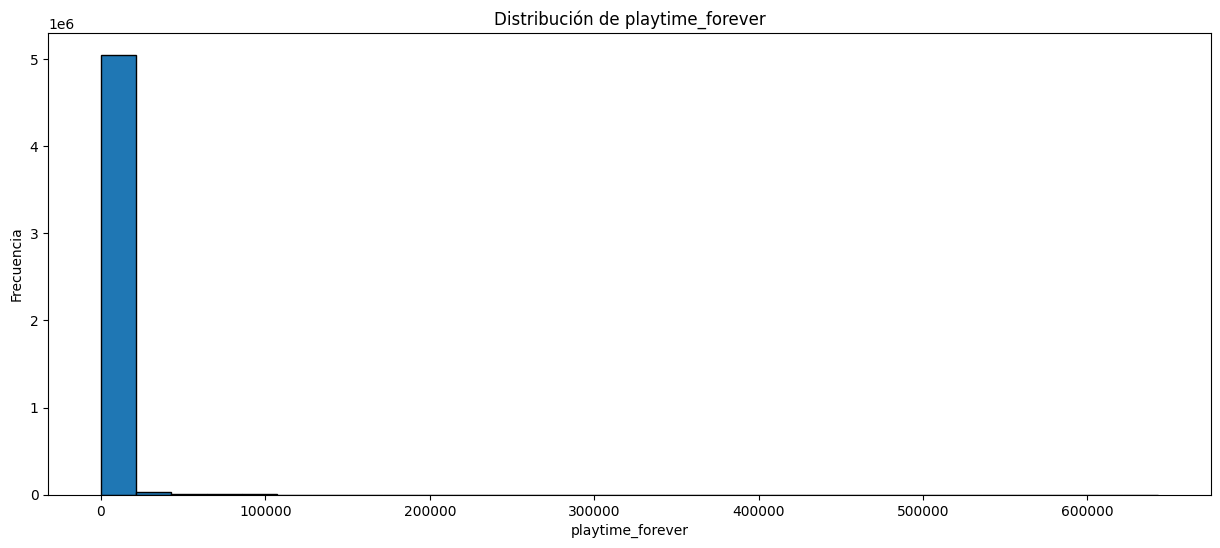

In [39]:
# Histograma de 'playtime_forever'
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 6)) 
plt.hist(df_items['playtime_forever'], bins=30, edgecolor='black')
plt.title('Distribución de playtime_forever')
plt.xlabel('playtime_forever')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


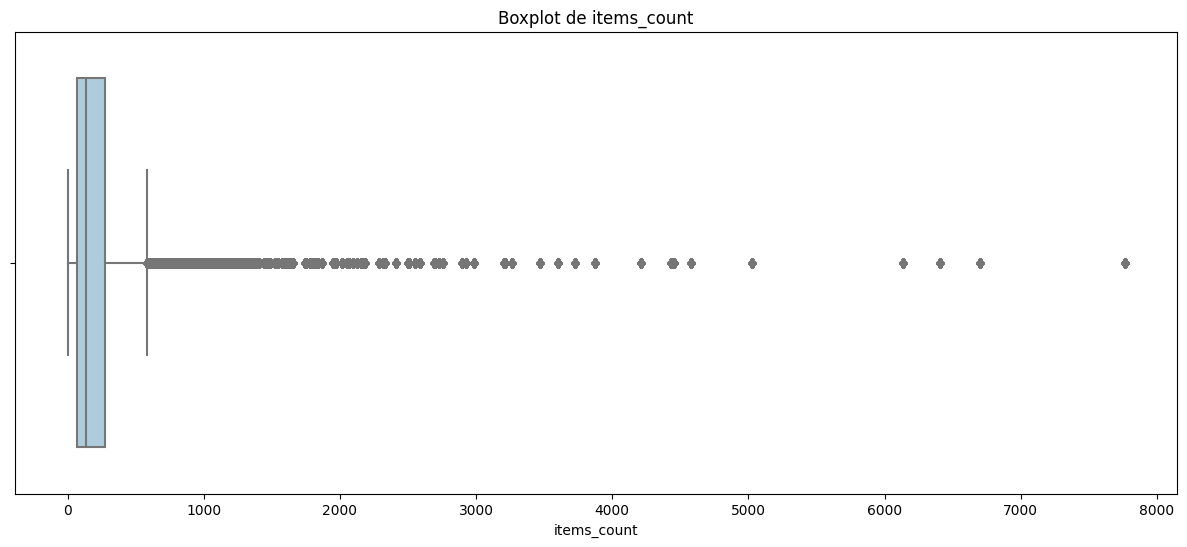

In [40]:
# Boxplot de 'items_count'
plt.figure(figsize=(15, 6)) 
sns.boxplot(x=df_items['items_count'], palette='Paired')
plt.title('Boxplot de items_count')
plt.show()

Distribución de varialbes categoricas

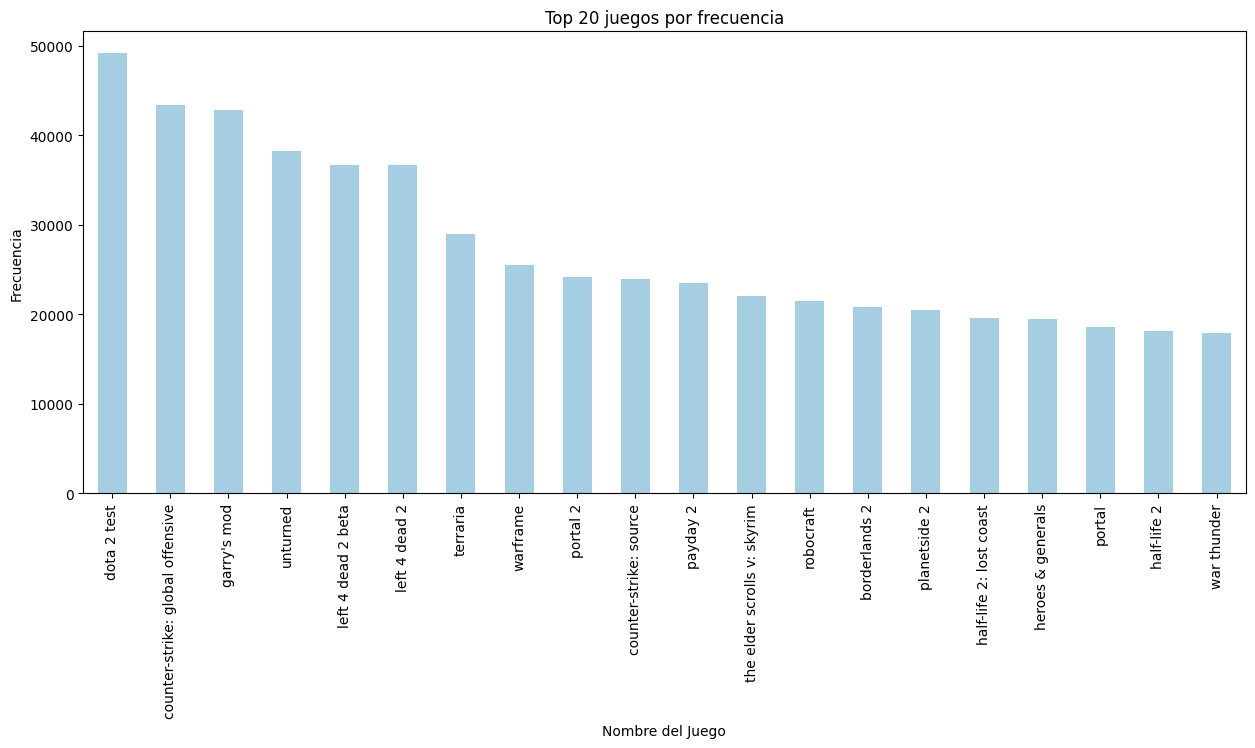

In [41]:
# Contar las frecuencias de 'item_name'
item_name_counts = df_items['item_name'].value_counts()

# Gráfico de barras
plt.figure(figsize=(15, 6))
item_name_counts.head(20).plot(kind='bar', colormap='Paired')
plt.title('Top 20 juegos por frecuencia')
plt.xlabel('Nombre del Juego')
plt.ylabel('Frecuencia')
plt.show()

## df_games

### Información Básica

In [42]:
df_games.head()

,title,release_date,id,genres
88310,Lost Summoner Kitty,2018-01-04,761140.0,Action
88310,Lost Summoner Kitty,2018-01-04,761140.0,Casual
88310,Lost Summoner Kitty,2018-01-04,761140.0,Indie
88310,Lost Summoner Kitty,2018-01-04,761140.0,Simulation
88310,Lost Summoner Kitty,2018-01-04,761140.0,Strategy


In [43]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74834 entries, 88310 to 120444
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         72783 non-null  string 
 1   release_date  72732 non-null  string 
 2   id            74833 non-null  float64
 3   genres        71551 non-null  object 
dtypes: float64(1), object(1), string(2)
memory usage: 2.9+ MB


In [44]:
df_games.isnull().sum()

title           2051
release_date    2102
id                 1
genres          3283
dtype: int64

#### Observaciones
- Solo hay un valor nulo en la columna id, mientras que en la columna title hay 2051 valores nulos, sin embargo, existe la posibilidad de 
imputar dichos valores por medio de la columna id

#### Eliminación e imputación de datos
Ya que los datos de las columnas 'id' y 'title', tambien estan presentes en df_items, se imputaran los titulos de los id correspondientes que se encuentren en df_items

In [45]:
filas_con_id_nulo = df_games[(df_games['id'].isnull())]
filas_con_id_nulo

,title,release_date,id,genres
88384,<NA>,<NA>,NaN,None


In [46]:
df_games = df_games.dropna(how='all')

In [47]:
filas_con_id_valido_y_title_nulo = df_games[(df_games['id'].notnull()) & (df_games['title'].isnull()) & (df_games['release_date'].isnull())]
filas_con_id_valido_y_title_nulo

,title,release_date,id,genres
88314,<NA>,<NA>,773570.0,None
88321,<NA>,<NA>,724910.0,None
88329,<NA>,<NA>,772590.0,None
88330,<NA>,<NA>,640250.0,None
88332,<NA>,<NA>,711440.0,None
...,...,...,...,...
120383,<NA>,<NA>,745900.0,None
120386,<NA>,<NA>,764110.0,None
120387,<NA>,<NA>,705860.0,None
120395,<NA>,<NA>,755540.0,None


In [48]:
# Seleccionar todas las filas con id válido y title nulo
filas_con_id_valido_y_title_nulo = df_games[(df_games['id'].notnull()) & (df_games['title'].isnull())]

# Iterar sobre las filas seleccionadas
for index, row in filas_con_id_valido_y_title_nulo.iterrows():
    id_valor = row['id']
    
    # Buscar directamente en el segundo DataFrame
    if 'item_id' in df_items.columns and 'item_name' in df_items.columns:  # Ajusta los nombres según tus datos reales
        filas_con_title_no_nulo_otro = df_items[(df_items['item_id'] == id_valor) & (df_items['item_name'].notnull())]
        # Verificar si hay alguna fila con title no nulo en el segundo DataFrame
        if not filas_con_title_no_nulo_otro.empty:
            # Tomar la primera fila con title no nulo en el segundo DataFrame
            fila_con_title_no_nulo_otro = filas_con_title_no_nulo_otro.iloc[0]
            # Imputar el valor de 'title' desde el segundo DataFrame
            df_games.at[index, 'title'] = fila_con_title_no_nulo_otro['item_name']





In [49]:
# Crear una máscara booleana que indica si todas las columnas excepto 'id' tienen valores nulos
columnas_excepto_id = ['title', 'release_date', 'genres']  # Agrega tus columnas
mascara_nulos = df_games.drop('id', axis=1).isnull().all(axis=1) & df_games['id'].notnull()

# Eliminar las filas que cumplen con la condición y asignar el resultado a un nuevo DataFrame
df_games = df_games[~mascara_nulos]

In [50]:
#Cambiar los tipos de datos de acuerdo a las necesidades de cada columna
df_games['genres'] = df_games['genres'].replace('','without data')
df_games['genres'] = df_games['genres'].apply(str)


In [51]:
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')
# Extraer solo la parte de la fecha
df_games['release_date'] = df_games['release_date'].dt.date


### Estadísticas Descriptivas

In [52]:
# Muestra la estadistica descriptiva del df
df_games.describe(include='all')

,title,release_date,id,genres
count,73184,71935,7.318600e+04,73186
unique,30455,3457,NaN,23
top,AutoTileSet,2017-08-31,NaN,Indie
freq,11,254,NaN,15858
mean,NaN,NaN,4.632779e+05,NaN
std,NaN,NaN,1.734691e+05,NaN
min,NaN,NaN,1.000000e+01,NaN
25%,NaN,NaN,3.427672e+05,NaN
50%,NaN,NaN,4.575200e+05,NaN
75%,NaN,NaN,5.983500e+05,NaN


#### Observaciones
- Hay 23 generos distintos, de los cuales el más frecuente es Indie con 15858 registros.

### Distribución de Variables Categoricas

c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\57315\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


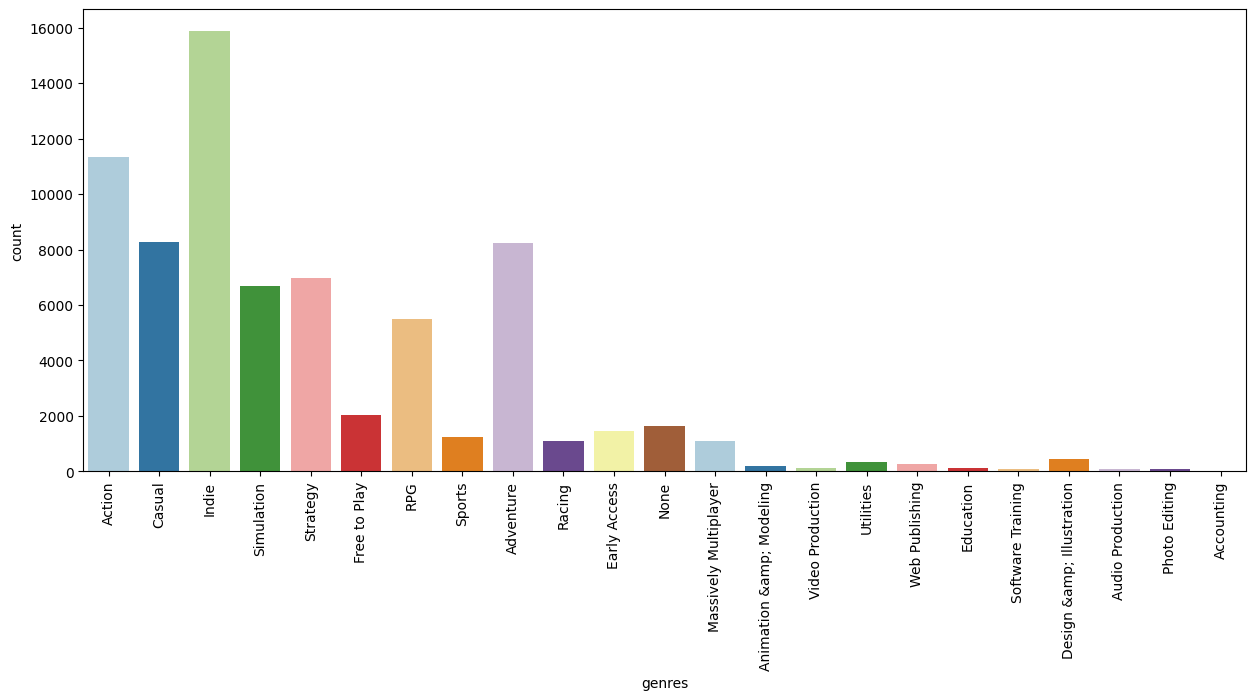

In [53]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 6))  # Ajusta los valores según sea necesario (ancho, alto)

# Crear el gráfico de barras
sns.countplot(x='genres', data=df_games, palette='Paired')

# Girar las etiquetas del eje x
plt.xticks(rotation=90)  # Ajusta el ángulo según sea necesario

# Mostrar el gráfico
plt.show()
